In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from pandas.plotting import scatter_matrix


In [24]:
# CONSTANTS
PATH = r'C:\Users\HP PAVILION 15\Downloads\Malware memory analysis\Obfuscated-MalMem2022.csv'

### Data Collection

In [25]:
# Loading the dataset
malware_full = pd.read_csv(PATH) 
malware_full.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [26]:
malware_full.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [27]:
malware_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [28]:
malware_full.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


### Data Wrangling (cleaning / preprocessing) 


In [29]:
# Separating predictors from the labels
malware_labels = malware_full["Class"]
malware_features = malware_full.drop("Class", axis=1)

In [30]:
malware_labels.value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(malware_labels)

In [32]:
# Splitting data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(malware_features, encoded_labels, test_size=0.20, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=23)

In [33]:
# Identify attributes with mean 0
def mean_zero(dataframe):
    means = dataframe.mean(numeric_only=True)
    mean_zero_atts = means[means == 0].index.tolist()

    return mean_zero_atts

mean_zero_list = mean_zero(X_train)
mean_zero_list

['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

In [34]:
X_train[mean_zero_list].describe()

,pslist.nprocs64bit,handles.nport,svcscan.interactive_process_services
count,37500.0,37500.0,37500.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [35]:
# Define function to drop attributes
def drop_columns(dataframe):
    return dataframe.drop(columns=mean_zero_list)


In [36]:
X_train.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,37500.000000,37500.000000,37500.000000,37500.0,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.0,...,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.0,37500.000000,37500.000000,37500.000000,37500.000000
mean,41.387680,14.719227,11.343442,0.0,247.803352,1810.763467,43.706677,1.027045e+04,249.917914,0.0,...,391.345253,221.406907,25.996133,25.06152,116.878693,0.0,121.993440,86.913493,0.000853,7.999867
std,5.691234,2.706358,1.586810,0.0,135.457353,330.679584,5.723248,5.837150e+03,179.286931,0.0,...,4.591465,2.030344,0.185937,1.52998,1.563736,0.0,2.835143,3.077691,0.029200,0.011546
min,21.000000,8.000000,1.994681,0.0,44.101064,670.000000,8.632979,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.00000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.973684,0.0,208.780488,1556.000000,38.844444,8.396000e+03,209.717949,0.0,...,389.000000,221.000000,26.000000,24.00000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.003305,0.0,243.905971,1736.000000,42.726499,9.288500e+03,247.204545,0.0,...,389.000000,221.000000,26.000000,24.00000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.860465,0.0,289.889848,2087.000000,49.593576,1.219125e+04,291.333746,0.0,...,395.000000,222.000000,26.000000,27.00000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,188.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.140984,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.00000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [37]:
# Create transformer to drop attributes
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
attribute_remover = FunctionTransformer(drop_columns)

In [38]:
# Segregating numerical and categorical attributes
def num_cat_split(dataframe):
    num = dataframe.drop(['Category'], axis=1)
    cat = dataframe[['Category']]

    return num, cat

X_train_num, X_train_cat = num_cat_split(X_train)

In [39]:
X_train_num[:2]

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
47044,40,16,9.72500,0,205.950000,1508,37.700000,8240,216.842105,0,...,389,221,26,24,116,0,119,87,0,8
12481,41,13,13.32269,0,301.912787,2141,52.219512,12378,301.912787,0,...,395,222,26,27,118,0,123,88,0,8


In [40]:
# Create pipeline to handle data cleaning and transforming
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('attr_remover', attribute_remover),
    ('std_scaler', StandardScaler())
])

In [41]:
from sklearn.compose import ColumnTransformer
num_attribs = list(X_train_num)
cat_attribs = ["Category"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [42]:
# Fit and transform training set using data preparation pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)

### Diagnostic analysis

In [97]:
y_train_ex = pd.Series(y_train, name='Class')
train_ex = pd.concat([X_train_num, y_train_ex], axis=1)

In [100]:
# Computing correlations 
corr_matrix = train_ex.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                                     1.000000
svcscan.nservices                         0.017011
svcscan.kernel_drivers                    0.016445
svcscan.shared_process_services           0.016102
svcscan.fs_drivers                        0.014021
svcscan.nactive                           0.012822
callbacks.ncallbacks                      0.009671
svcscan.process_services                  0.009232
dlllist.ndlls                             0.008079
pslist.nproc                              0.007773
handles.nthread                           0.007234
modules.nmodules                          0.007069
handles.nevent                            0.006881
dlllist.avg_dlls_per_proc                 0.006249
handles.nsection                          0.006088
pslist.avg_threads                        0.005555
handles.nsemaphore                        0.005526
handles.ntimer                            0.005467
callbacks.nanonymous                      0.005402
handles.ndesktop               

In [114]:
most_correlated = ['svcscan.nservices','svcscan.kernel_drivers', 'svcscan.shared_process_services', 'svcscan.fs_drivers', 'svcscan.nactive']
 

 #'callbacks.ncallbacks', 'svcscan.process_services', 'dlllist.ndlls', 'pslist.nproc', 'handles.nthread'

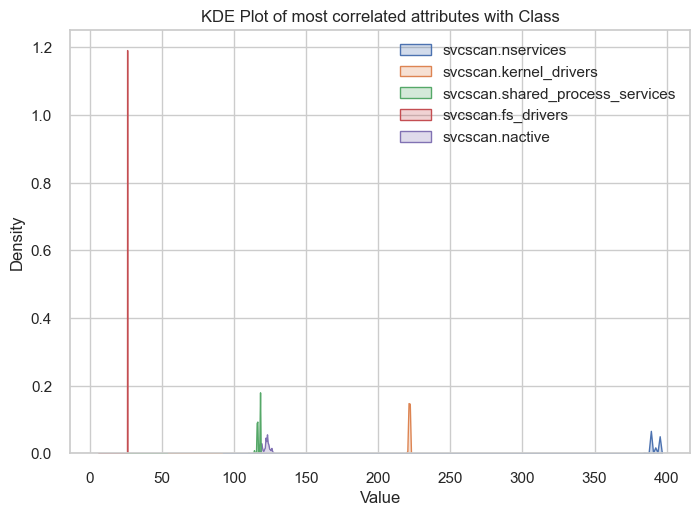

In [125]:
# Create a KDE plot using Seaborn
sns.kdeplot(X_train[most_correlated], fill=True)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot of most correlated attributes with Class')

plt.show()

In [103]:
# Retrieve attribute names with standard deviation above 100
std_dev = X_train_num.std()

attributes_above_100 = std_dev[std_dev > 100].index.tolist()
attributes_above_100

['pslist.avg_handlers',
 'dlllist.ndlls',
 'handles.nhandles',
 'handles.avg_handles_per_proc',
 'handles.nfile',
 'handles.nevent',
 'handles.nkey',
 'handles.nthread',
 'handles.nsection',
 'malfind.commitCharge']

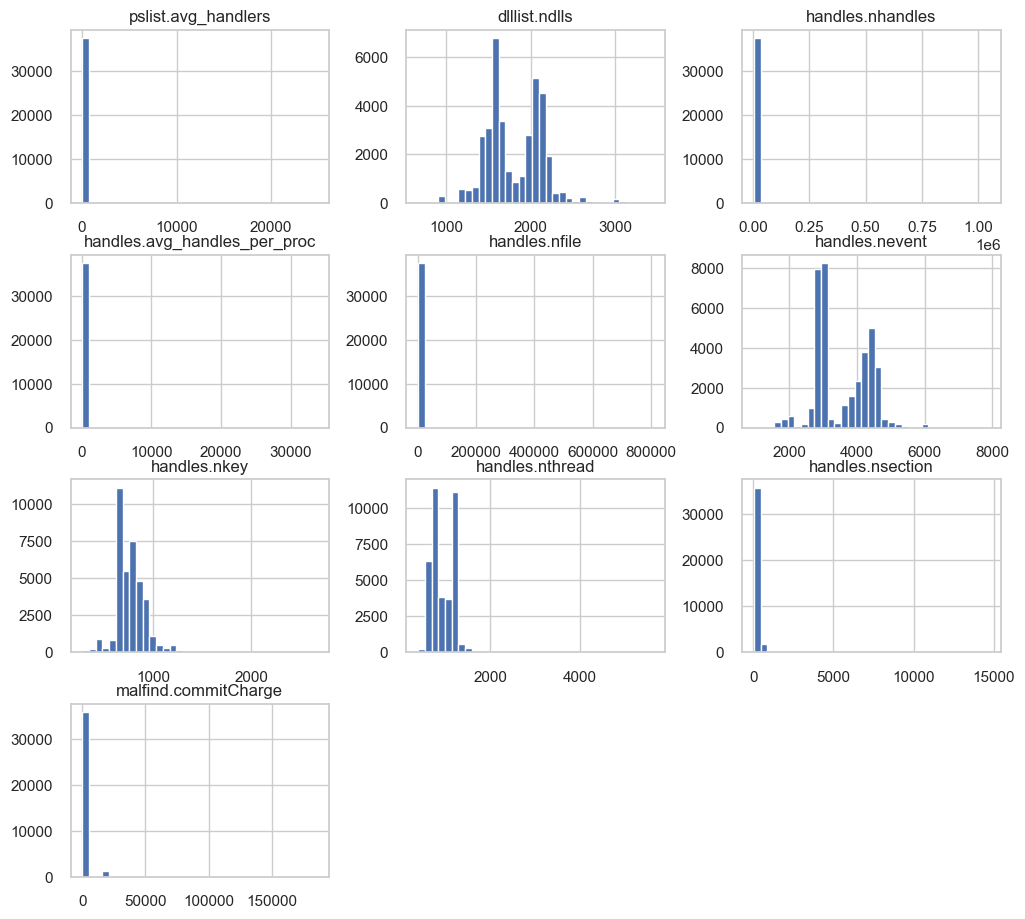

In [134]:
# Histograms of select attributes with highest standard deviation
X_train_num[attributes_above_100].hist(bins=35, figsize=(12, 11))
plt.show()

### Predictive Analysis

##### Build baseline models using Logistic Regression and Support Vector Machines

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [45]:
# Training a logistic regression algorithm on data
log_regression = LogisticRegression(random_state=23)
log_regression.fit(X_train_prepared, y_train)

LogisticRegression(random_state=23)

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict

log_predictions = cross_val_predict(log_regression, X_train_prepared, y_train, cv=3)

In [48]:
confusion_matrix(y_train, log_predictions)

array([[18722,     1],
       [    5, 18772]], dtype=int64)

In [49]:
# Compute logistic regression precision and recall
log_precision = precision_score(y_train, log_predictions)
log_recall = recall_score(y_train, log_predictions)

In [50]:
print(f'Log precision: {log_precision} \nLog Recall: {log_recall}')

Log precision: 0.999946732008736 
Log Recall: 0.9997337167811684


In [51]:
# Compute Area under the ROC; the evaluating performance metric
from sklearn.metrics import roc_auc_score
y_scores_log = log_regression.decision_function(X_train_prepared)
roc_auc_score(y_train, y_scores_log)

1.0

Support Vector Machine

In [55]:
# training  support vector machine on dataset
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(dual='auto', random_state=23, max_iter=1500)
linearsvc.fit(X_train_prepared, y_train)

LinearSVC(dual='auto', max_iter=1500, random_state=23)

In [56]:
# Compute svm predictions
svm_predictions = cross_val_predict(linearsvc, X_train_prepared, y_train, cv=3)

In [57]:
confusion_matrix(y_train, svm_predictions)

array([[18723,     0],
       [    2, 18775]], dtype=int64)

In [58]:
# Compute svm  precision and recall
svm_precision = precision_score(y_train, svm_predictions)
svm_recall = recall_score(y_train, svm_predictions)

In [59]:
print(f'Svm precision: {svm_precision} \nSvm Recall: {svm_recall}')

Svm precision: 1.0 
Svm Recall: 0.9998934867124674


In [60]:
y_scores_svm = linearsvc.decision_function(X_train_prepared)
roc_auc_score(y_train, y_scores_svm)

1.0

##### Evaluating models on validation set

In [64]:
# fit and transform validation data on full pipeline
X_val_prep = full_pipeline.fit_transform(X_val)

Logistic regression

In [65]:
log_val_pred = cross_val_predict(log_regression, X_val_prep, y_val, cv=3)

In [66]:
confusion_matrix(y_val, log_val_pred)

array([[4697,    2],
       [   1, 4676]], dtype=int64)

Support vector machine

In [67]:
svm_val_pred = cross_val_predict(linearsvc, X_val_prep, y_val, cv=3)

In [69]:
confusion_matrix(y_val, svm_val_pred)

array([[4699,    0],
       [   0, 4677]], dtype=int64)

##### Final model training

In [83]:
# Prepare full training data; pass throug data pipeline
X_train_val = X_train_val.drop('Category', axis=1)
train_val_prep = num_pipeline.fit_transform(X_train_val) 

In [84]:
# Chose the support vector classifier over the logistic regression algorithm as a result of better performance results and shorter training time
final_svc = linearsvc.fit(train_val_prep, y_train_val)
final_svc

LinearSVC(dual='auto', max_iter=1500, random_state=23)

Model Evaluation and testing

In [78]:
x_test = X_test.drop('Category', axis=1)

In [85]:
# Prepare test set for evaluation
X_test_prep = num_pipeline.transform(x_test)

In [86]:
final_svc_pred = cross_val_predict(final_svc, X_test_prep, y_test, cv=3)

In [87]:
confusion_matrix(y_test, final_svc_pred)

array([[5872,    4],
       [   5, 5839]], dtype=int64)

In [89]:
# Compute final svc precision and recall
svc_precision = precision_score(y_test, final_svc_pred)
svc_recall = recall_score(y_test, final_svc_pred)

In [90]:
print(f'Final svc precision: {svc_precision} \nFinal svc Recall: {svc_recall}')

Final svc precision: 0.9993154201608763 
Final svc Recall: 0.9991444216290212


In [91]:
y_scores_svc = final_svc.decision_function(X_test_prep)
roc_auc_score(y_test, y_scores_svc)

0.9999761498064728

In [119]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svc)

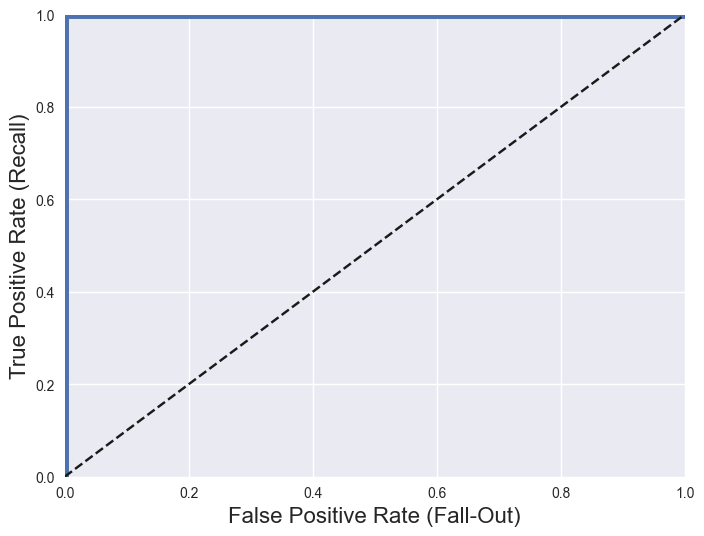

In [120]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=5, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, 'Support Vector Machine')
plt.show()